In [1]:
import numpy as np
import os

In [2]:
import baobap as bao

In [3]:
from input_data import dynamical_regimes
from src import clustering_frequency_data

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter, LogFormatterSciNotation
from cycler import cycler
%matplotlib inline

In [5]:
# use the same colours as in the phase space plot
cmap = plt.get_cmap("Accent")
bounds = [-1, 0, 1, 2, 3]
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

In [6]:
matplotlib.style.use("fast") # fivethirtyeight
matplotlib.rcParams.update({'font.size': 15,
                            'xtick.labelsize': 15,
                            'ytick.labelsize': 15,
                           'axes.prop_cycle': cycler(color=[cmap(norm(0)), cmap(norm(1)), cmap(norm(-1)), cmap(norm(2))],#["tab:purple", "blue", "r", "grey"],
                                                      linestyle=[(0, ()), (0, (5, 1)), (0, (1, 1)), (0, (3, 1, 1, 1, 1, 1))])
                           })

reducedblue = (*cmap(norm(1))[:3], .6)
reducedgreen = (*cmap(norm(-1))[:3], .6)
reducedgrey = (*cmap(norm(2))[:3], .6)
hatches = [".", "\\", "//"]

In [7]:
max_alpha = 0.3
batch_size = 1000.

In [8]:
def secondary_axis(ax, alphas, number_of_desync):
    avg_desync = np.mean(number_of_desync, axis=0)
    ax2 = ax.twinx()
    ax2.set_ylim(0, 100)
    ax2.set_yscale("symlog", basey=10, subsy=[2,3,4,5,6,7,8,9])
    ax2.yaxis.set_major_formatter(ScalarFormatter())
    ax2.yaxis.set_ticks_position('right')
    ax2.yaxis.set_label_position("right")
    ax2.spines['right'].set_color("tab:purple")
    ax2.tick_params(axis='y', colors="tab:purple")
    ax2.yaxis.label.set_color("tab:purple")
    ax2.plot(alphas, avg_desync, "k-", alpha=1, linewidth=2.5, color="tab:purple")
    if i == 2:
        ax2.set_ylabel(r"$\overline{N_d}$", rotation=0)#, position=(1, 0.9))
    else:
        ax2.set_yticklabels([])
    ax2.grid(False)

In [9]:
def main_plot(ax, alphas, result_dir, result_file, ana):
    number_of_desync, n_clusters, sync, solitary, exotic_solitary, composite, exotic_composite, other = clustering_frequency_data(result_dir, result_file, ana[3])
    ax.plot(alphas, np.sum(sync, axis=0), c=cmap(norm(0)), lw=1.5)
    ax.plot(alphas, np.sum(solitary, axis=0) + np.sum(composite, axis=0), c=cmap(norm(1)), lw=1.5)
    ax.plot(alphas, np.sum(exotic_solitary, axis=0) + np.sum(exotic_composite, axis=0), c=cmap(norm(-1)), lw=1.5)    
    ax.plot(alphas, np.sum(other, axis=0), c=reducedgrey, lw=1.5)
    #ax.plot(alphas, np.sum(cluster_solitary, axis=0), c=reducedgreen, lw=1.5)
    #ax.plot(alphas, np.sum(multi_solitary, axis=0), c=reducedblue, lw=1.5)
    return number_of_desync

simulation_data/resubmission/northern/cp_3_PK_0p167_D2KH_0p010
simulation_data/resubmission/northern/cp_3_PK_0p167_D2KH_0p10
simulation_data/resubmission/northern/cp_3_PK_0p167_D2KH_10
simulation_data/resubmission/northern/cp_1_PK_0p167_D2KH_0p010
simulation_data/resubmission/northern/cp_1_PK_0p167_D2KH_0p10
simulation_data/resubmission/northern/cp_1_PK_0p167_D2KH_10
simulation_data/resubmission/northern/cp_1_PK_0p056_D2KH_0p10
simulation_data/resubmission/northern/cp_1_PK_0p056_D2KH_10


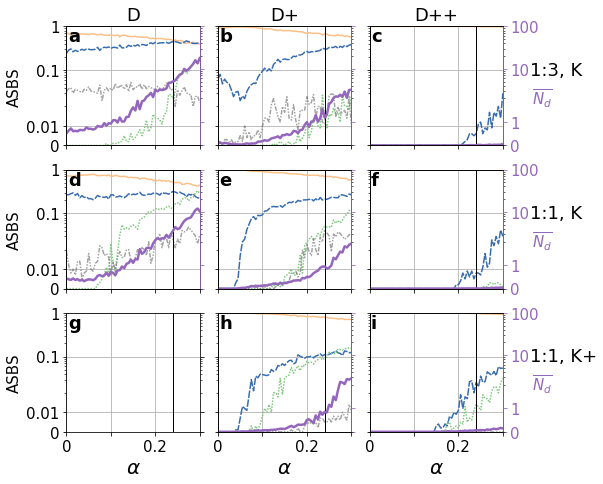

In [10]:
fig1, f1_axes = plt.subplots(ncols=3, nrows=3, 
                             constrained_layout=True, 
                             sharex=True,
                             sharey=True,
                             gridspec_kw={"wspace":0.05, "hspace": 0.05})
fig1.set_size_inches((8.27, 8.27 * 0.8))

labels = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]

counter = 0
for row in f1_axes:
    for ax in row:
        ax.set_ylim(0, batch_size)
        ax.set_xlim(0, max_alpha)
        ax.axvline(x=0.24, c="k", linestyle="-", linewidth=1, zorder=10)
        #ax.set_facecolor('w')
        ax.set_yscale("symlog", basey=10, subsy=[2,3,4,5,6,7,8,9], linthreshy=batch_size/40)
        ax.set_yticks([0, int(batch_size/100.), int(batch_size/10.), batch_size])
        ax.set_xticks([0., 0.1, 0.2, 0.3])
        ax.set_xticklabels(["0", "", "0.2", ""])
        ax.text(0.01, 0.99, labels[counter], ha='left', va='top', fontsize=18, weight='bold', transform=ax.transAxes, zorder=10)
        #ax.text(0.06, 0.92, labels[counter], ha='center', va='center', fontsize=15, transform=ax.transAxes)
        ax.grid(True)
        counter += 1
        
for row in f1_axes:
    for ax in row:
        ticks = ax.get_yticks()
        ax.yaxis.set_ticks_position('both')
        ax.set_yticklabels(["{:g}".format(t/batch_size) for t in ticks])
        
for i in range(3):
    f1_axes[2, i].set_xlabel(r"$\alpha$", fontsize=20)
    f1_axes[i, 0].set_ylabel(r"ASBS")

font_classes = 18

f1_axes[0, 2].text(.36, 100, "1:3, K", ha='left', va='center', fontsize=font_classes)
f1_axes[1, 2].text(.36, 100, "1:1, K", ha='left', va='center', fontsize=font_classes)
f1_axes[2, 2].text(.36, 100, "1:1, K+", ha='left', va='center', fontsize=font_classes)

f1_axes[0, 0].set_title("D", fontsize=font_classes)
f1_axes[0, 1].set_title("D+", fontsize=font_classes)
f1_axes[0, 2].set_title("D++", fontsize=font_classes)

# first row: Scandinavian grid, cp=3, P/K=0.167
#f1_axes[0, 0].set_title("1:3")
#f1_axes[0, 1].set_title("1:3, D+")
#f1_axes[0, 2].set_title("1:3, D++")

for i, dr in enumerate(dynamical_regimes[6:9]):
    name = ("cp_{}_PK_{:.3f}_D2KH_{:.3f}").format(*dr.values()).rstrip('.0').replace(".", "p") + "0"
    sim_dir = os.path.join("simulation_data/resubmission/northern", name)
    print(sim_dir)
    alphas = np.load(os.path.join(sim_dir, "alphas.npy"))
    
    _, ana = bao.load_state_for_analysis(os.path.join(sim_dir, "analysis.p"))
    result_dir = os.path.join(sim_dir, "results_ASBS")
    result_file = os.path.join(sim_dir, "results_ASBS.hdf")
    
    number_of_desync = main_plot(f1_axes[0, i], alphas, result_dir, result_file, ana)
    secondary_axis(f1_axes[0, i], alphas, number_of_desync)
    
    
# second row: Scandinavian grid, cp=1, P/K=0.167
#f1_axes[1, 0].set_title("")
#f1_axes[1, 1].set_title("D+")
#f1_axes[1, 2].set_title("D++")

for i, dr in enumerate(dynamical_regimes[0:3]):
    name = ("cp_{}_PK_{:.3f}_D2KH_{:.3f}").format(*dr.values()).rstrip('.0').replace(".", "p") + "0"
    sim_dir = os.path.join("simulation_data/resubmission/northern", name)
    print(sim_dir)
    alphas = np.load(os.path.join(sim_dir, "alphas.npy"))
    
    _, ana = bao.load_state_for_analysis(os.path.join(sim_dir, "analysis.p"))
    result_dir = os.path.join(sim_dir, "results_ASBS")
    result_file = os.path.join(sim_dir, "results_ASBS.hdf")

    number_of_desync = main_plot(f1_axes[1, i], alphas, result_dir, result_file, ana)
    secondary_axis(f1_axes[1, i], alphas, number_of_desync)

    
# third row: Scandinavian grid, cp=1, P/K=0.055
#f1_axes[2, 0].set_title("K+")
#f1_axes[2, 1].set_title("K+, D+")
#f1_axes[2, 2].set_title("K+, D++")

for ii, dr in enumerate(dynamical_regimes[4:6]):
    i = ii + 1
    name = ("cp_{}_PK_{:.3f}_D2KH_{:.3f}").format(*dr.values()).rstrip('.0').replace(".", "p") + "0"
    sim_dir = os.path.join("simulation_data/resubmission/northern", name)
    print(sim_dir)
    alphas = np.load(os.path.join(sim_dir, "alphas.npy"))
    
    _, ana = bao.load_state_for_analysis(os.path.join(sim_dir, "analysis.p"))
    result_dir = os.path.join(sim_dir, "results_ASBS")
    result_file = os.path.join(sim_dir, "results_ASBS.hdf")

    number_of_desync = main_plot(f1_axes[2, i], alphas, result_dir, result_file, ana)
    secondary_axis(f1_axes[2, i], alphas, number_of_desync)
    

In [11]:
# third row, first plot: synthetic networks topology
dr = dynamical_regimes[3]

name = ("cp_{}_PK_{:.3f}_D2KH_{:.3f}").format(*dr.values()).rstrip('.0').replace(".", "p") + "0"
sim_dir = os.path.join("simulation_data/resubmission/northern", name)
print(sim_dir)
alphas = np.load(os.path.join(sim_dir, "alphas.npy"))

_, ana = bao.load_state_for_analysis(os.path.join(sim_dir, "analysis.p"))
result_dir = os.path.join(sim_dir, "results_ASBS")
result_file = os.path.join(sim_dir, "results_ASBS.hdf")
number_of_desync, n_clusters, sync, solitary, exotic_solitary, composite, exotic_composite, other = clustering_frequency_data(result_dir, result_file, ana[3])

avg_desync = np.mean(number_of_desync, axis=0)

f1_axes[2, 0].plot(alphas, np.sum(sync, axis=0), "-w", lw=2)
f1_axes[2, 0].plot(alphas, np.sum(solitary, axis=0) + np.sum(composite, axis=0), "-w", lw=2)
f1_axes[2, 0].plot(alphas, np.sum(exotic_solitary, axis=0) + np.sum(exotic_composite, axis=0), "-w", lw=2)    
f1_axes[2, 0].plot(alphas, np.sum(other, axis=0), "-w", lw=2)

f1_axes[2, 0].plot(alphas, np.sum(sync, axis=0), c=cmap(norm(0)), lw=1.5)
f1_axes[2, 0].plot(alphas, np.sum(solitary, axis=0) + np.sum(composite, axis=0), c=cmap(norm(1)), lw=1.5)
f1_axes[2, 0].plot(alphas, np.sum(exotic_solitary, axis=0) + np.sum(exotic_composite, axis=0), c=cmap(norm(-1)), lw=1.5)    
f1_axes[2, 0].plot(alphas, np.sum(other, axis=0), c=reducedgrey, lw=1.5)
#f1_axes[2, 0].plot(alphas, np.sum(cluster_solitary, axis=0), c=reducedgreen, lw=1.5)
#f1_axes[2, 0].plot(alphas, np.sum(multi_solitary, axis=0), c=reducedblue, lw=1.5)

sync_dist = np.zeros((13, len(alphas)))
soli_dist = np.zeros((13, len(alphas)))
exotic_dist = np.zeros((13, len(alphas)))
other_dist = np.zeros((13, len(alphas)))
cluster_dist = np.zeros((13, len(alphas)))
multi_dist = np.zeros((13, len(alphas)))

for suffix in range(13):
    name = ("cp_{}_PK_{:.3f}_D2KH_{:.3f}").format(*dr.values()).rstrip('.0').replace(".", "p") + str(suffix)
    sim_dir = os.path.join("simulation_data/resubmission/synthetic/", name)
    print(sim_dir)
    try:
        alphas = np.load(os.path.join(sim_dir, "alphas.npy"))
        
        _, ana = bao.load_state_for_analysis(os.path.join(sim_dir, "analysis.p"))
        result_dir = os.path.join(sim_dir, "results_ASBS")
        result_file = os.path.join(sim_dir, "results_ASBS.hdf")
        number_of_desync, n_clusters, sync, solitary, exotic_solitary, composite, exotic_composite, other = clustering_frequency_data(result_dir, result_file, ana[3])
        avg_desync = np.mean(number_of_desync, axis=0)

        
        sync_dist[suffix] = np.sum(sync, axis=0)
        soli_dist[suffix] = np.sum(solitary, axis=0)
        exotic_dist[suffix] = np.sum(exotic_solitary, axis=0)
        other_dist[suffix] = np.sum(other, axis=0)
        cluster_dist[suffix] = np.sum(exotic_composite, axis=0)
        multi_dist[suffix] = np.sum(composite, axis=0)

    except:
        print("no data")   

f1_axes[2, 0].fill_between(alphas, y1=np.percentile(exotic_dist + cluster_dist, 25, axis=0), y2=np.percentile(exotic_dist, 75, axis=0), color=cmap(norm(-1)), alpha=0.5)
f1_axes[2, 0].fill_between(alphas, y1=np.percentile(sync_dist, 25, axis=0), y2=np.percentile(sync_dist, 75, axis=0), color=cmap(norm(0)), alpha=0.5)
f1_axes[2, 0].fill_between(alphas, y1=np.percentile(soli_dist + multi_dist, 25, axis=0), y2=np.percentile(soli_dist, 75, axis=0), color=cmap(norm(1)), alpha=0.5)
f1_axes[2, 0].fill_between(alphas, y1=np.percentile(other_dist, 25, axis=0), y2=np.percentile(other_dist, 75, axis=0), color=cmap(norm(2)), alpha=0.5)
  

simulation_data/resubmission/northern/cp_1_PK_0p056_D2KH_0p010
simulation_data/resubmission/synthetic/cp_1_PK_0p056_D2KH_0p010
simulation_data/resubmission/synthetic/cp_1_PK_0p056_D2KH_0p011
simulation_data/resubmission/synthetic/cp_1_PK_0p056_D2KH_0p012
simulation_data/resubmission/synthetic/cp_1_PK_0p056_D2KH_0p013
simulation_data/resubmission/synthetic/cp_1_PK_0p056_D2KH_0p014
simulation_data/resubmission/synthetic/cp_1_PK_0p056_D2KH_0p015
simulation_data/resubmission/synthetic/cp_1_PK_0p056_D2KH_0p016
no data
simulation_data/resubmission/synthetic/cp_1_PK_0p056_D2KH_0p017
simulation_data/resubmission/synthetic/cp_1_PK_0p056_D2KH_0p018
simulation_data/resubmission/synthetic/cp_1_PK_0p056_D2KH_0p019
simulation_data/resubmission/synthetic/cp_1_PK_0p056_D2KH_0p0110
simulation_data/resubmission/synthetic/cp_1_PK_0p056_D2KH_0p0111
simulation_data/resubmission/synthetic/cp_1_PK_0p056_D2KH_0p0112
no data


In [12]:
fig1.savefig("figures/fig4.pdf", facecolor="w", bbox_inches = 'tight', pad_inches = 0)
    